In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Admission_Predict.csv')
print(data.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [2]:
print( data.shape)

(400, 9)


In [3]:
print(data.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [4]:
print(data.corr())

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   
Chance of Admit      0.042336   0.802610     0.791594           0.711250   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138          0.042336  
GRE Score          0.612831  0.557555  0.833060  0.580391          0.802610  
TOEFL

In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


In [6]:
print(data.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.34000

In [7]:
print("University ratings:", set(data["University Rating"]), "Research:", set(data["Research"]))


University ratings: {1, 2, 3, 4, 5} Research: {0, 1}


<Axes: xlabel='GRE Score', ylabel='CGPA'>

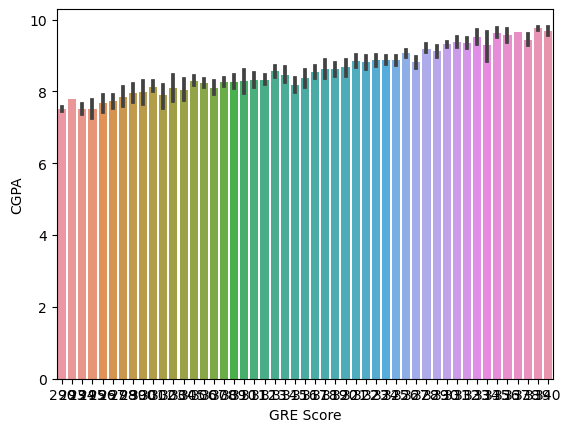

In [8]:
sns.barplot(x=data["GRE Score"], y=data["CGPA"])

<Axes: xlabel='University Rating', ylabel='CGPA'>

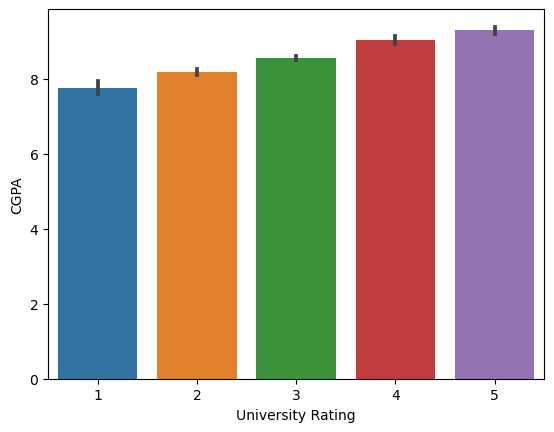

In [9]:
sns.barplot(x=data["University Rating"], y=data["CGPA"])

<Axes: xlabel='University Rating', ylabel='TOEFL Score'>

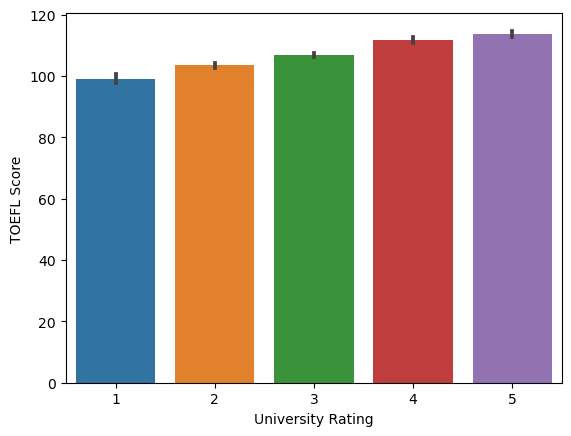

In [10]:
sns.barplot(x=data["University Rating"], y=data["TOEFL Score"])

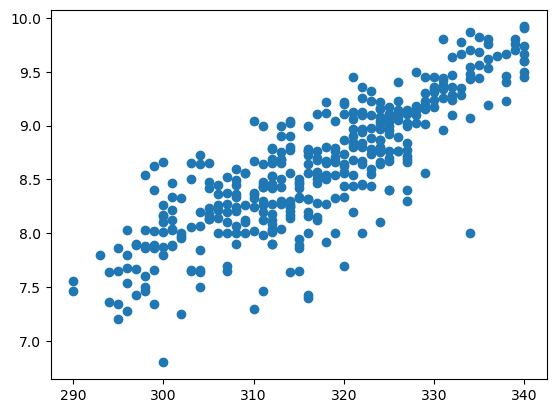

In [11]:
plt.scatter(data['GRE Score'], data['CGPA'])

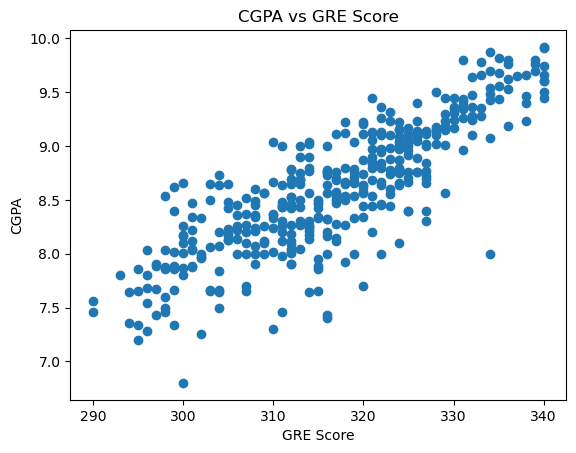

In [12]:
plt.scatter(data['GRE Score'], data['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

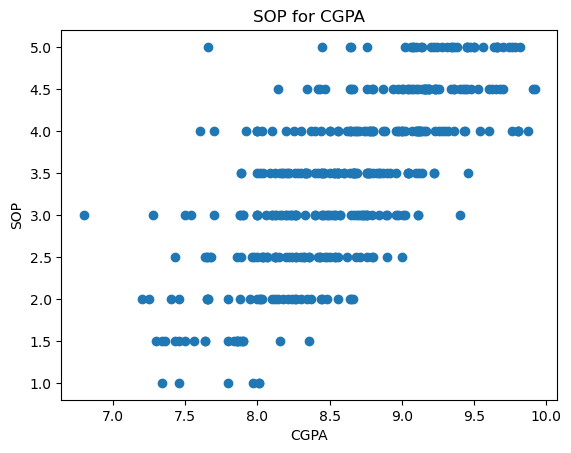

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [13]:
plt.scatter(data['CGPA'], data['SOP'])
plt.title('SOP for CGPA')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()
plt.figure(figsize=(10, 10))

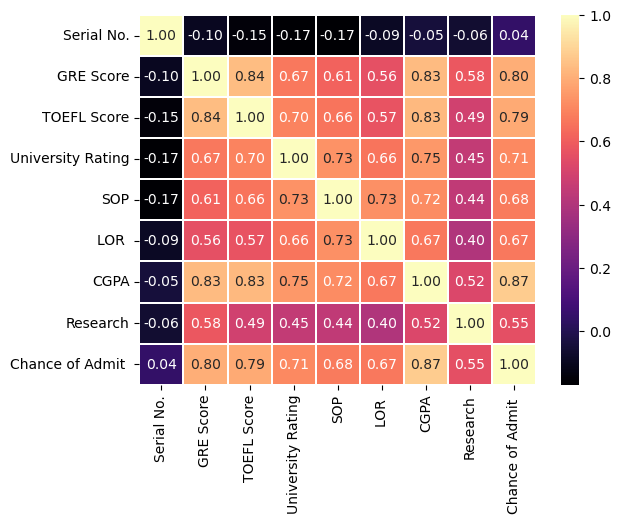

In [14]:
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt='.2f', cmap="magma")
plt.show()

In [15]:
data.Research.value_counts()

1    219
0    181
Name: Research, dtype: int64

In [16]:
data['University Rating'].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

<Axes: xlabel='University Rating', ylabel='count'>

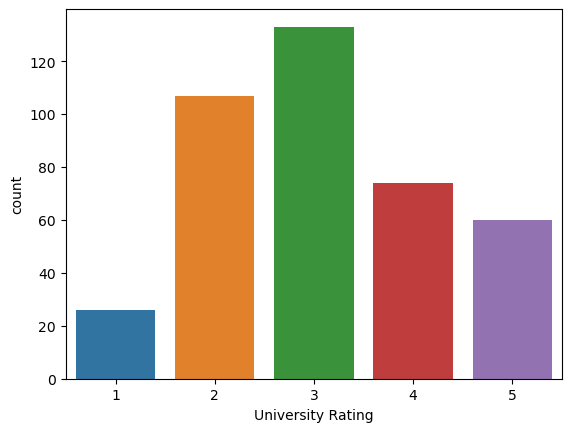

In [17]:
sns.countplot(x="University Rating", data=data)

<Axes: xlabel='University Rating', ylabel='Chance of Admit '>

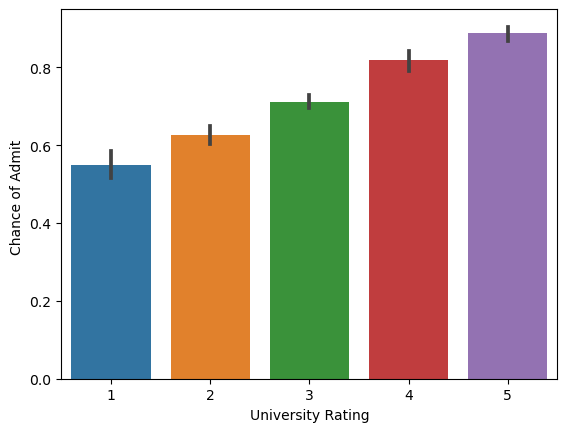

In [18]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=data)


In [19]:
x = data.drop(['Serial No.', 'Chance of Admit '], axis=1)

In [20]:
y = data['Chance of Admit ']

In [21]:
print(x.shape, y.shape)


(400, 7) (400,)


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [23]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(320, 7) (80, 7) (320,) (80,)


In [24]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train[x_train.columns] = mms.fit_transform(x_train[x_train.columns].values)
x_test[x_test.columns] = mms.transform(x_test[x_test.columns].values)

In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

[0.6969 0.6689 0.5803 0.776  0.9237 0.7117 0.6747 0.7116 0.9089 0.6893
 0.8291 0.6441 0.7859 0.8227 0.7011 0.6285 0.668  0.9212 0.5071 0.9412
 0.9137 0.5733 0.7404 0.7832 0.7879 0.9441 0.8882 0.6509 0.6135 0.6878
 0.5274 0.6941 0.7066 0.8109 0.767  0.6863 0.6844 0.6955 0.4769 0.8288
 0.5249 0.5784 0.8211 0.6117 0.631  0.707  0.8168 0.6485 0.8702 0.5213
 0.7614 0.5295 0.5845 0.7644 0.5278 0.6519 0.7118 0.6374 0.6846 0.4878
 0.7872 0.7366 0.924  0.9157 0.8331 0.798  0.9257 0.7043 0.9381 0.8457
 0.9272 0.7179 0.8866 0.6272 0.6355 0.6619 0.8818 0.8091 0.6693 0.4827]
166    0.65
112    0.62
51     0.56
48     0.82
187    0.93
       ... 
102    0.62
173    0.89
115    0.66
241    0.65
378    0.56
Name: Chance of Admit , Length: 80, dtype: float64


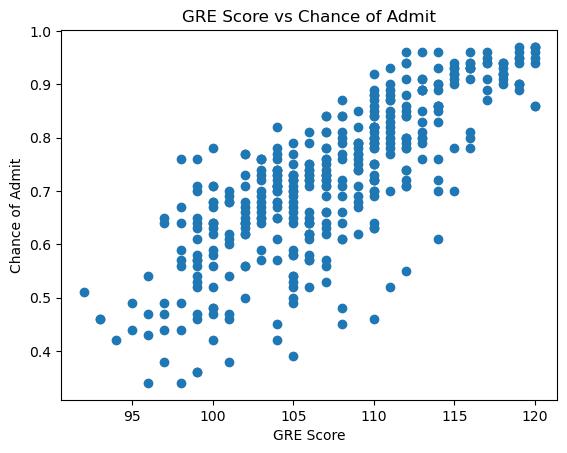

In [26]:
plt.scatter(data['TOEFL Score'], data['Chance of Admit '])
plt.title('GRE Score vs Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, roc_auc_score,r2_score,recall_score, mean_absolute_error
print('model score:', model.score(x_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('roc score:', roc_auc_score(y_test > 0.5, y_pred > 0.5))
print('recall score:', recall_score(y_test > 0.5, y_pred > 0.5))

model score: 0.690897648486668
Mean Absolute Error: 0.055869999999999996
Mean Squared Error: 0.005662750249999998
Root Mean Squared Error: 0.07525124749796509
roc score: 0.6360078277886496
recall score: 0.9863013698630136


In [32]:
x1 = data.drop(['Serial No.', 'Chance of Admit '], axis=1)
y1 = data['Chance of Admit ']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.fit_transform(x1_test)
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x1_train, y1_train)
y1_pred = model1.predict(x1_test)

In [33]:
print('model score:', model1.score(x1_test, y1_test))
print('Mean Absolute Error:', mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y1_test, y1_pred)))
print('roc score:', roc_auc_score(y1_test > 0.5, y1_pred > 0.5))
print('recall score:', recall_score(y1_test > 0.5, y1_pred > 0.5))

model score: 0.6987920809400441
Mean Absolute Error: 0.05130785813926666
Mean Squared Error: 0.006778943068999751
Root Mean Squared Error: 0.08233433712006037
roc score: 0.6040688575899844
recall score: 0.9859154929577465


In [37]:
x2 = data.iloc[:, 1:8].values
y2 = data.iloc[:, -1:].values
x2_train, x2_test, y2_train, y2_test = train_test_split(x1, y1, test_size=0.2)
y2_train = y2_train > 0.5
y2_test = y2_test > 0.5
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter=1000)
model2.fit(x2_train, y2_train)

LogisticRegression(max_iter=1000)

In [38]:
y2_pred = model2.predict(x2_test)
print('model score:', model2.score(x2_test, y2_test))
print('roc score:', roc_auc_score(y2_test, y2_pred))
print('recall score:', recall_score(y2_test, y2_pred))

model score: 0.8875
roc score: 0.6593137254901962
recall score: 0.9852941176470589


In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))